## Classification model to predict Survival rate in Titanic dataset

In [501]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [502]:
df = sns.load_dataset("titanic")
df.to_csv("titanic.csv")

In [503]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [505]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [506]:
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [507]:
df2 = df.copy()
df2 = df2.drop(columns=["deck"])
df2 = df2.drop(columns=["alive"])

In [508]:
df2.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone'],
      dtype='object')

In [509]:
df2["embark_town"] = df2["embark_town"].fillna(df2["embark_town"].mode()[0])

In [510]:
df2["embarked"] = df2["embarked"].fillna(df2["embarked"].mode()[0])

In [511]:
df2["age"] = df2["age"].fillna(df2["age"].mean())

In [512]:
df2.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [513]:
df2.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone'],
      dtype='object')

In [514]:

# encoding the categorical values and object values
le=LabelEncoder()
for col in df2.columns:
    if df2[col].dtype=='object' or df[col].dtype.name=='category':
        df2[col]=le.fit_transform(df2[col])

Text(0.5, 1.0, 'Boxplot to Identify Outliers')

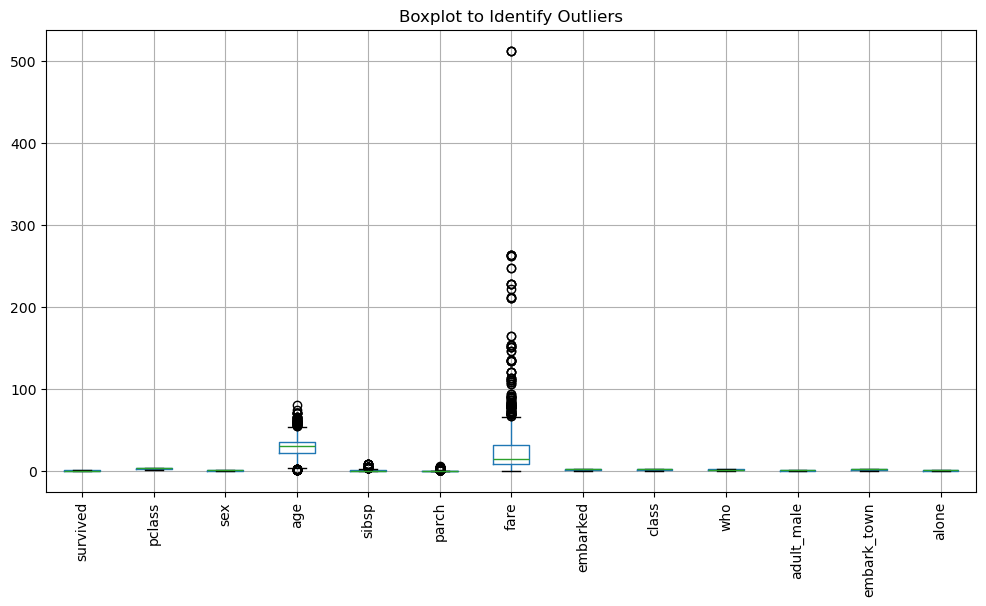

In [515]:

# Create boxplots for  check outliers
plt.figure(figsize=(12,6))
df2.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot to Identify Outliers")


In [516]:
# remove outliers

# use IQR approach to remove outliers


q1 = df2.select_dtypes(include= np.number).quantile(0.25)
q3 = df2.select_dtypes(include=np.number).quantile(0.75)
# Inteqaurtile Range Formula 
iqr = q3 - q1 
# formula of upper and lower outliers 
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace moderate values with upper/lower bounds instead of removing rows
df2_clean = df2.copy()
for i in df2_clean.select_dtypes(include=np.number).columns:
    df2_clean[i] = np.where(df2_clean[i] < lower_bound[i] , lower_bound[i] , df2_clean[i])
    df2_clean[i] = np.where(df2_clean[i] > upper_bound[i] , upper_bound[i] , df2_clean[i])


Text(0.5, 1.0, 'Boxplot to Identify Outliers')

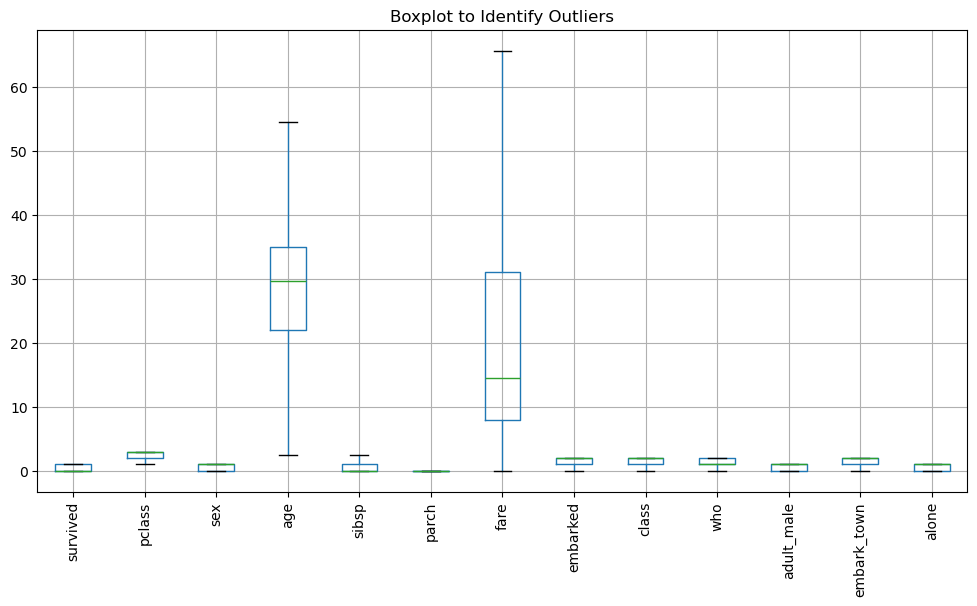

In [517]:
# Create boxplots for  check outliers
plt.figure(figsize=(12,6))
df2_clean.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot to Identify Outliers")

In [518]:
# Select Features and label

x = df2_clean.drop(columns=["survived"])
y = df2_clean["survived"]

In [519]:
# split data for training and testing

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [520]:

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [521]:
# model selection

model = LogisticRegression()

In [522]:
model.fit(x_train , y_train)

LogisticRegression()

In [523]:
# how much model learn
score_rate = model.score(x_train , y_train)
print("Training Accuracy : " ,score_rate)

Training Accuracy :  0.8188202247191011


In [524]:
y_predict = model.predict(x_test)

In [525]:
y_predict

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1.])

In [526]:
# Evvaluation

accuracy = accuracy_score(y_test , y_predict)

print("Accuracy Score:", accuracy)

Accuracy Score: 0.8044692737430168


In [527]:
# confussion metrix

conf_metrix = confusion_matrix(y_test ,y_predict)
print("Confusion Matrix : " , conf_metrix)

Confusion Matrix :  [[87 18]
 [17 57]]


In [528]:
print('Classification Report:', classification_report(y_test,y_predict))

Classification Report:               precision    recall  f1-score   support

         0.0       0.84      0.83      0.83       105
         1.0       0.76      0.77      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



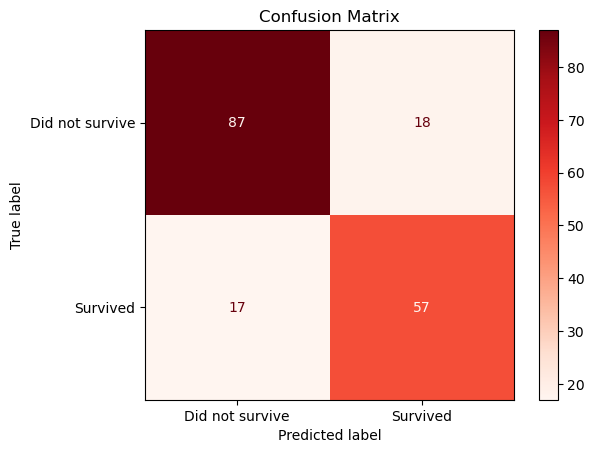

In [529]:
#confusion metrix visualization using confusion matrix display
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Did not survive", "Survived"])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

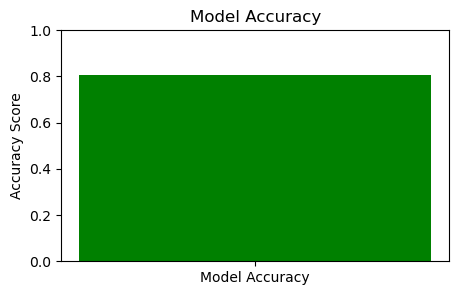

In [530]:
# accuracy score visualization using barplot
plt.figure(figsize=(5, 3))
plt.bar(["Model Accuracy"], [accuracy], color='green')
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy")
plt.show()